# Hackathon Two

LearnX Predictions

## Imports

In [1]:
import pandas as pd
pd.set_option("display.max_columns", None) 
import requests
import numpy as np
import time
from os import path
from datetime import datetime
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
#from skopt import BayesSearchCV #scikit-optimize
#from skopt.space import Real, Categorical, Integer
import math
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt
import json

#removing all the warnings
import warnings
warnings.filterwarnings('ignore')

## Step 0 - Import the data


In [2]:
# Importing the training data
train_df = pd.read_csv('train.csv', index_col = 'ID')

# Importing the test data
test_df = pd.read_csv('test.csv')

In [3]:
# Preview the first five rows of the train set
train_df.head()

,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
ID,,,,,,,,,,
1,1,1,Development,Course,0,1,1,11004,0.007,81
2,2,1,Development,Course,0,0,1,13650,0.007,79
3,3,1,Development,Course,0,0,1,11655,0.007,75
4,4,1,Development,Course,0,0,1,12054,0.007,80
5,5,1,Development,Course,0,0,1,6804,0.007,41


In [4]:
# Preview the first five rows of the test set
test_df.head()

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,Competition_Metric
0,883,883,1,Development,Course,1,0,1,0.007
1,884,884,1,Development,Course,1,0,1,0.007
2,885,885,1,Development,Course,1,0,1,0.007
3,886,886,1,Development,Course,1,0,1,0.007
4,887,887,1,Development,Course,0,0,1,0.007


In [5]:
# Check the shape of the train and test sets
print(f'The shape of the train set is: {train_df.shape}\nThe shape of the test set is: {test_df.shape}')

The shape of the train set is: (512087, 10)
The shape of the test set is: (36000, 9)


#### Target Distributions

In [6]:
def target_distribution(data, target):
    # calculating descriptives of variable
    mini = data[target].min()
    maxi = data[target].max()
    ran = data[target].max()-data[target].min()
    mean = data[target].mean()
    median = data[target].median()
    st_dev = data[target].std()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    plt.figure(figsize=(10,8))

    sns.distplot(data[target]);

    plt.title('std_dev = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                            (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                       round(mean,2),round(median,2)));

<IPython.core.display.Javascript object>

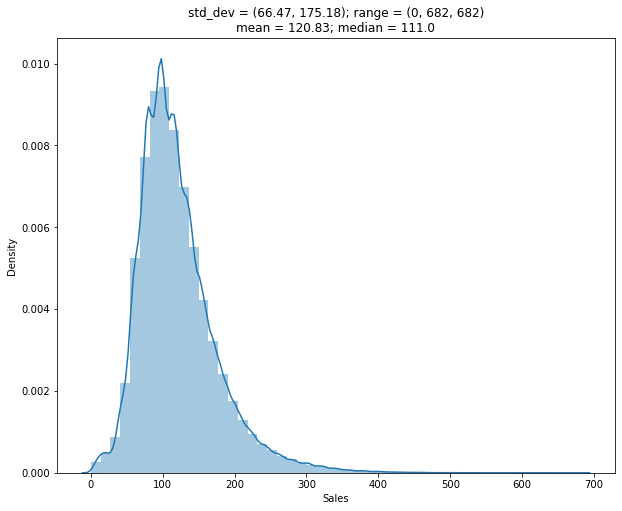

In [7]:
# checking the target distribution
target_distribution(train_df, 'Sales')

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Sales', ylabel='Density'>

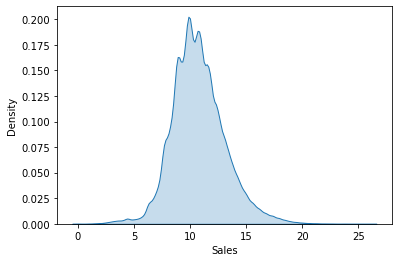

In [8]:
# checking the target square root distribution
sns.kdeplot(np.sqrt(train_df["Sales"]), fill=True)

## Step 1 - Type Casting

In [9]:
# Typecasting
train_df['Short_Promotion'] = train_df['Short_Promotion'].astype('O')
train_df['Public_Holiday'] = train_df['Public_Holiday'].astype('O')
train_df['Long_Promotion'] = train_df['Long_Promotion'].astype('O')
train_df['Course_ID'] = train_df['Course_ID'].astype('O')

## Step 2 - EDA

#### Univariate Analysis: Numeriacal Variables

In [10]:
# What each column starts with refers to where the  data was sourced from 
# Numerical datatypes
numerical_cols = train_df.select_dtypes(include=['int64','float64','Int64']).columns.tolist()

# checking numerical columns
numerical_cols

['Day_No', 'User_Traffic', 'Competition_Metric', 'Sales']

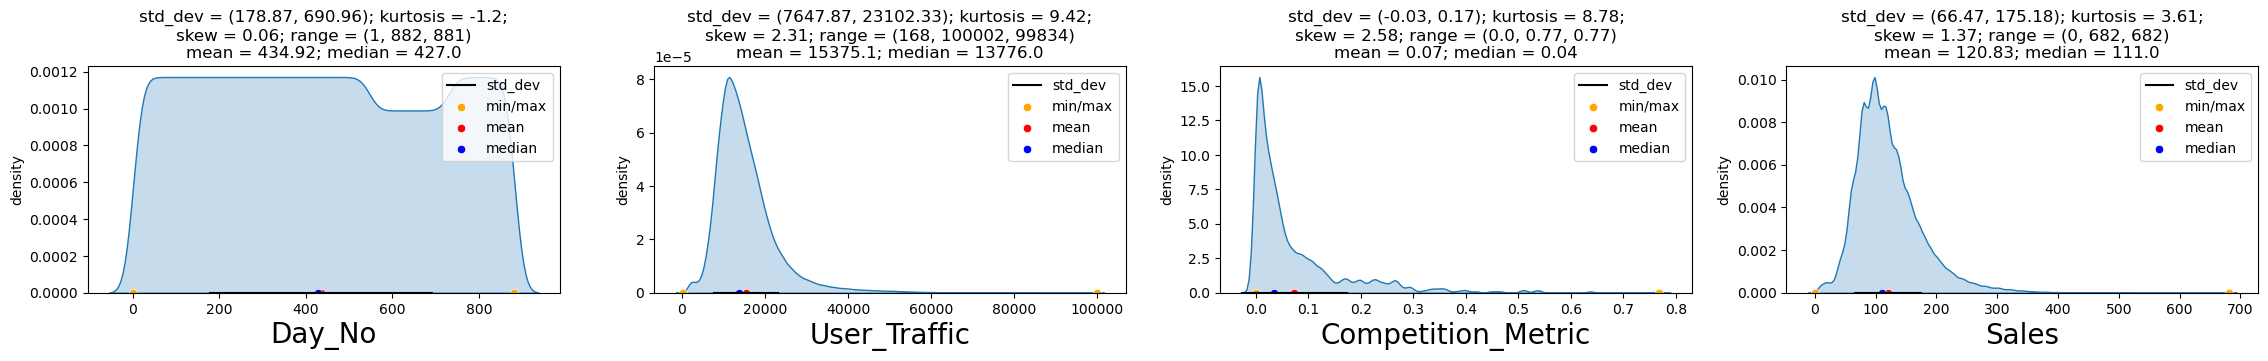

In [11]:
from Kaushik_EDA import UVA_numeric
UVA_numeric(train_df,numerical_cols)

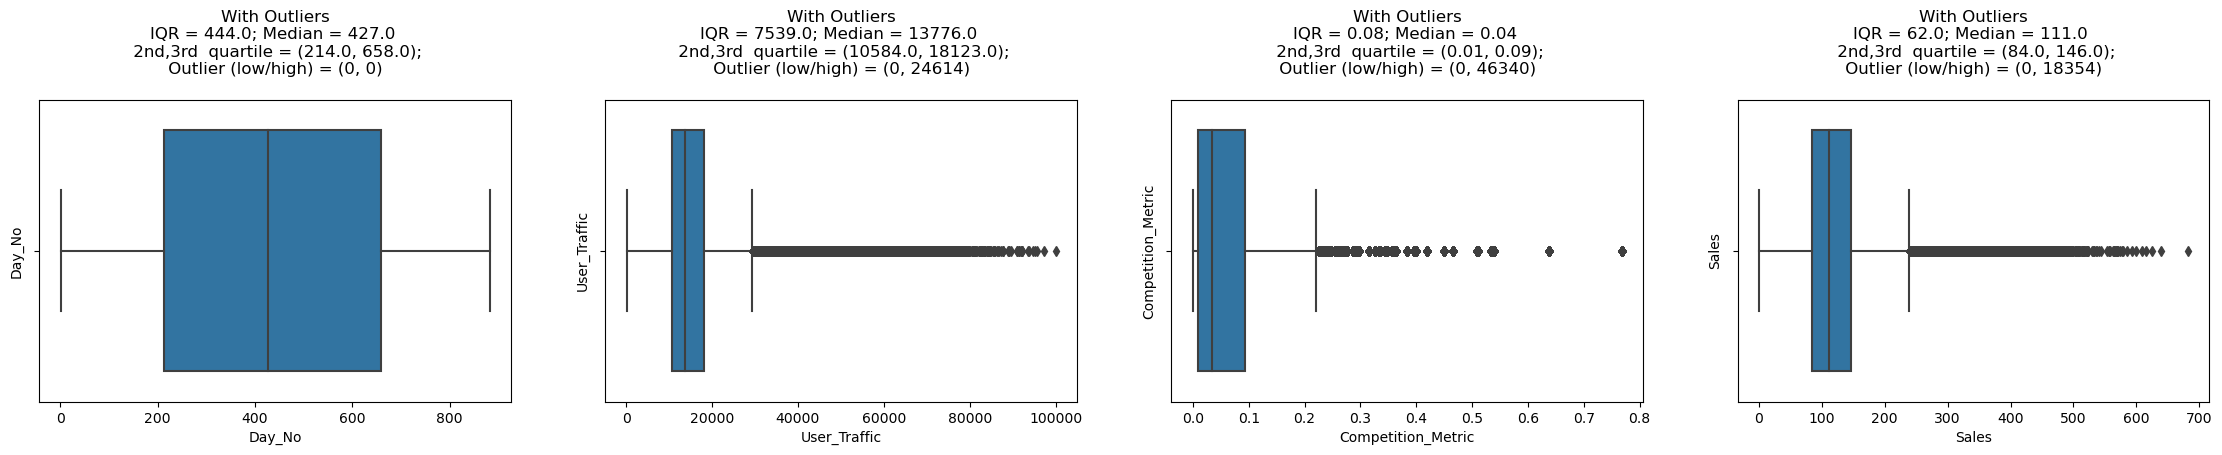

In [12]:
from Kaushik_EDA import UVA_outlier
UVA_outlier(train_df, numerical_cols)

#### Bivariate Analysis : Numerical-Numerical

<IPython.core.display.Javascript object>

<Figure size 780x520 with 0 Axes>

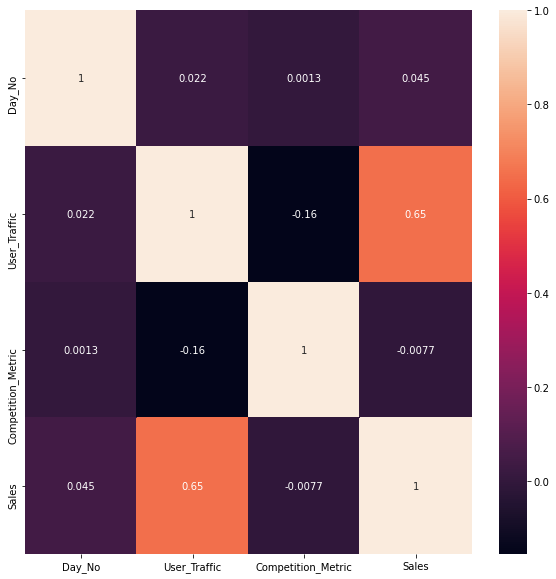

In [13]:
plt.figure(dpi=130)
corr = train_df[numerical_cols].corr(method='kendall')
figure = plt.figure(figsize=(10, 10));
sns.heatmap(data=corr, annot=True);

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='User_Traffic', ylabel='Sales'>

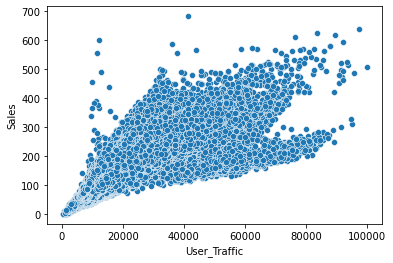

In [14]:
# Plotting the relationship between the User_Traffic and Sales.
sns.scatterplot(train_df["User_Traffic"], train_df["Sales"])

#### Univariate Analysis : Categorical Varibales

In [15]:
# creating a list of categorical cols
categorical_cols = train_df.select_dtypes(exclude=['int64','float64','Int64']).columns.tolist()

# checking categorical cols
categorical_cols.remove('Course_ID')
categorical_cols

['Course_Domain',
 'Course_Type',
 'Short_Promotion',
 'Public_Holiday',
 'Long_Promotion']

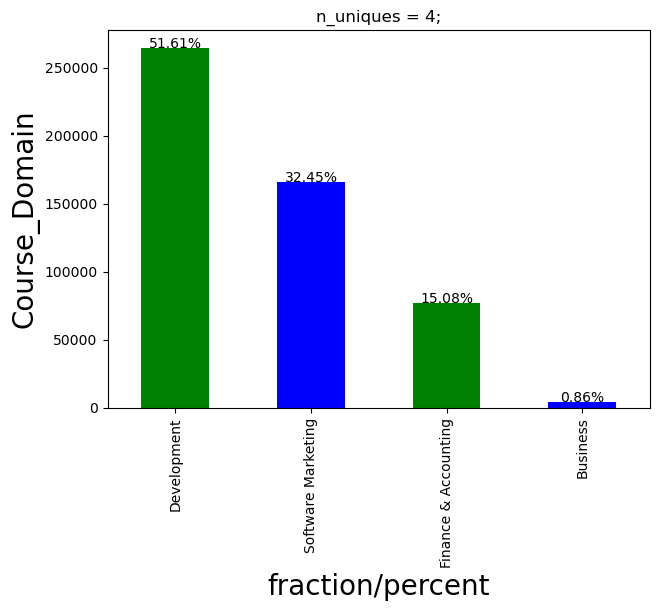

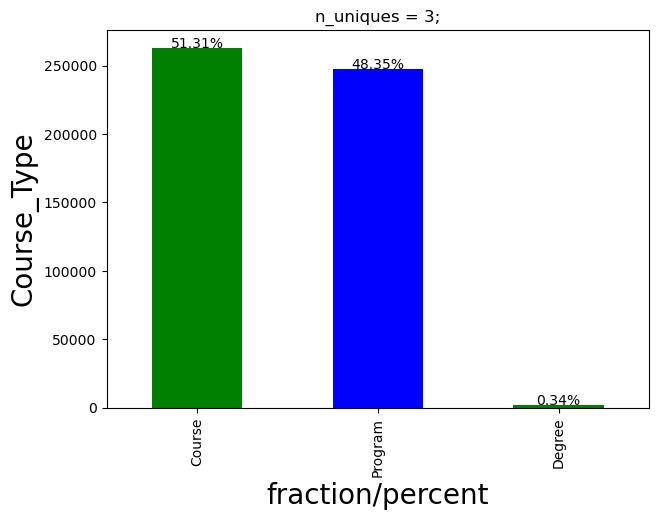

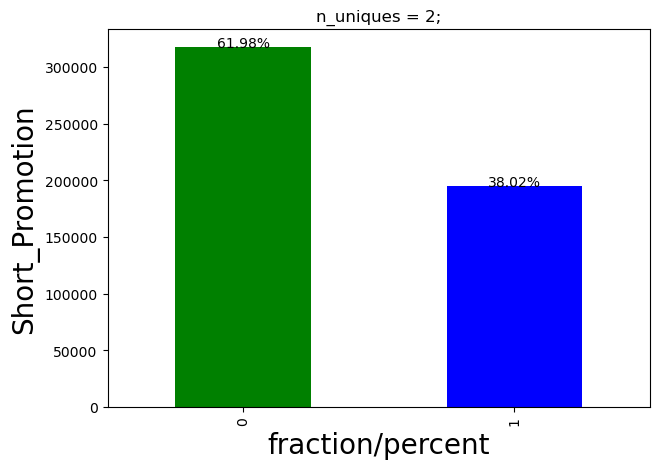

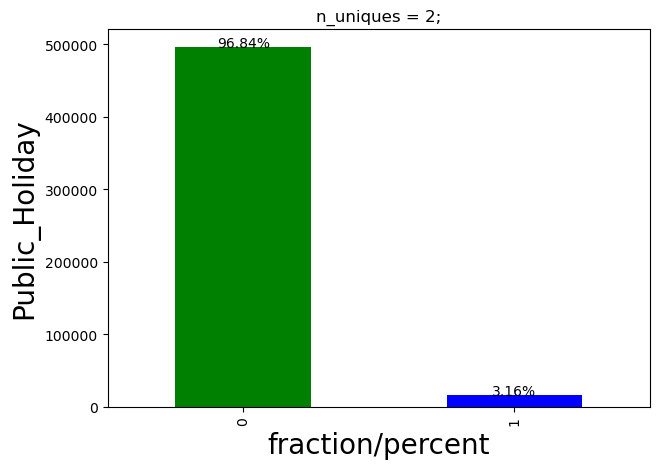

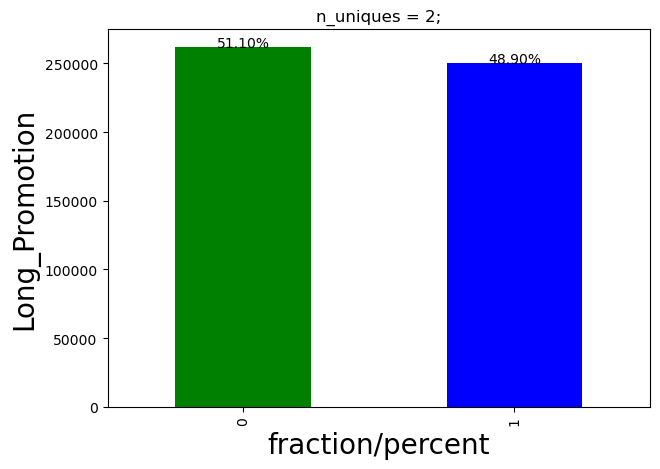

In [16]:
from Kaushik_EDA import UVA_category
for i in categorical_cols:
    UVA_category(train_df, [i])

#### Bivariate : Categorical Continuous

##### Categorical Variables Vs Sales

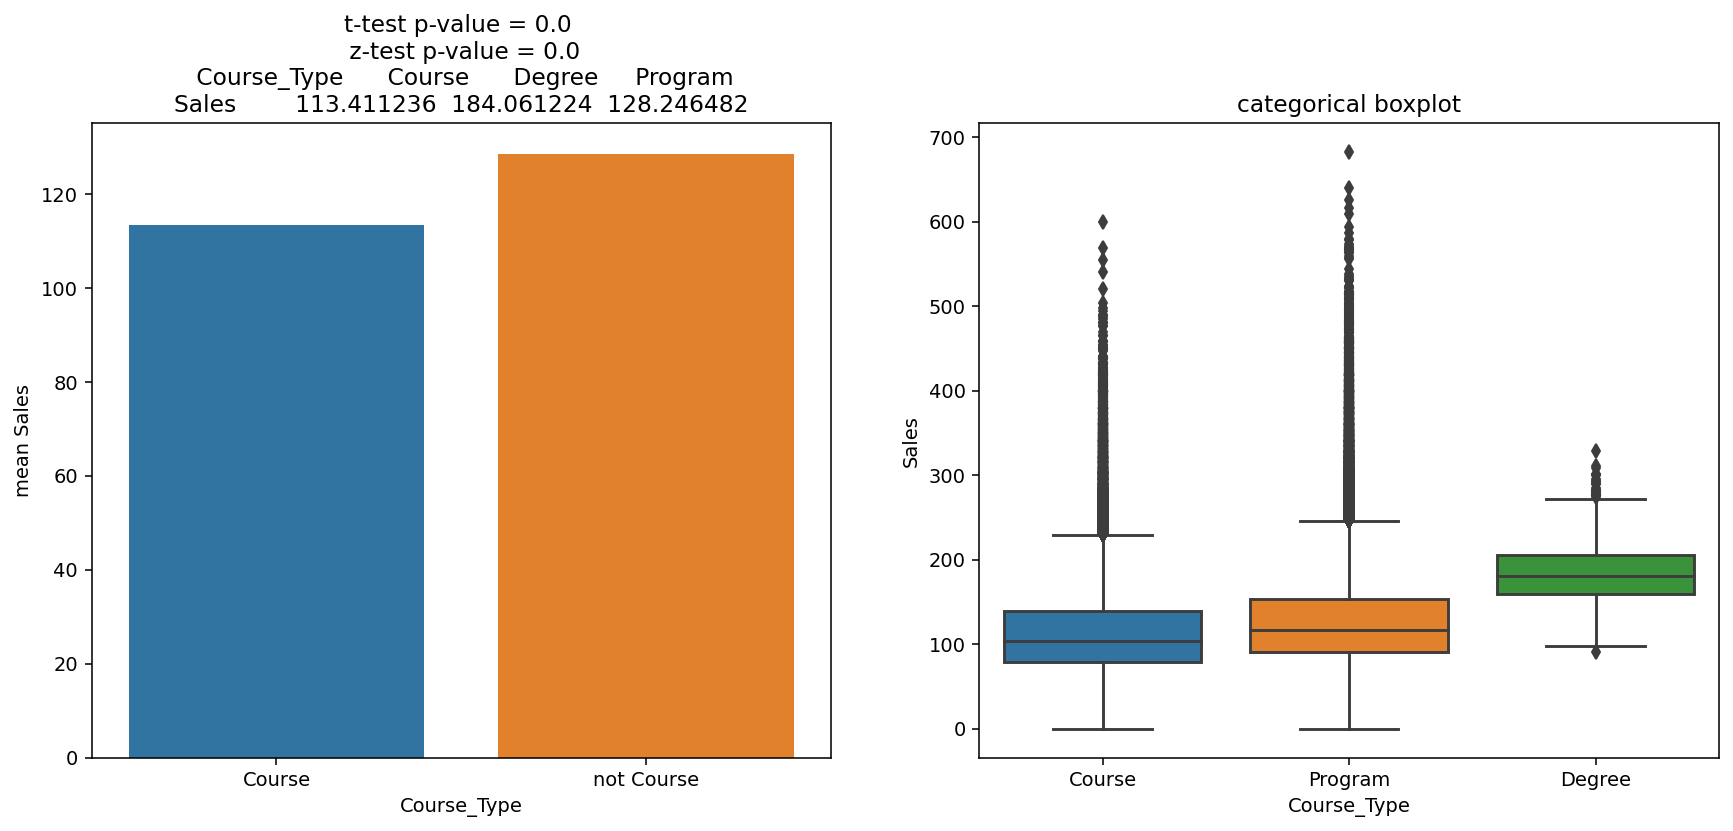

In [17]:
from Kaushik_EDA import Bivariate_cont_cat
Bivariate_cont_cat(train_df, 'Sales', "Course_Type", 'Course')

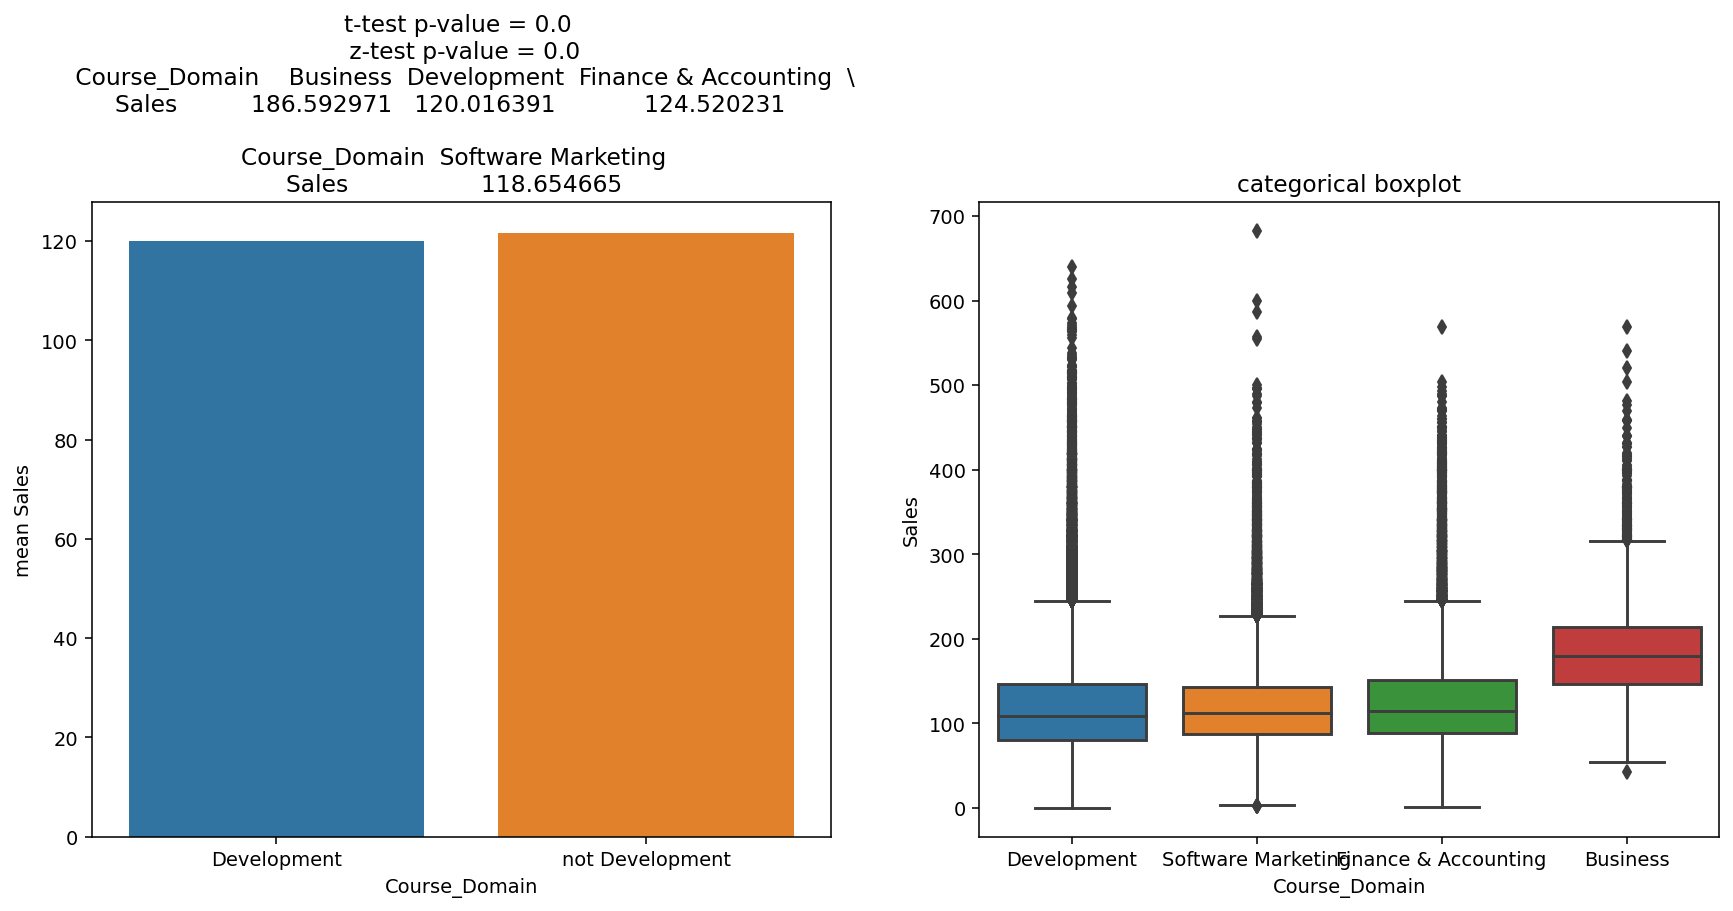

In [18]:
Bivariate_cont_cat(train_df, 'Sales', "Course_Domain", 'Development')

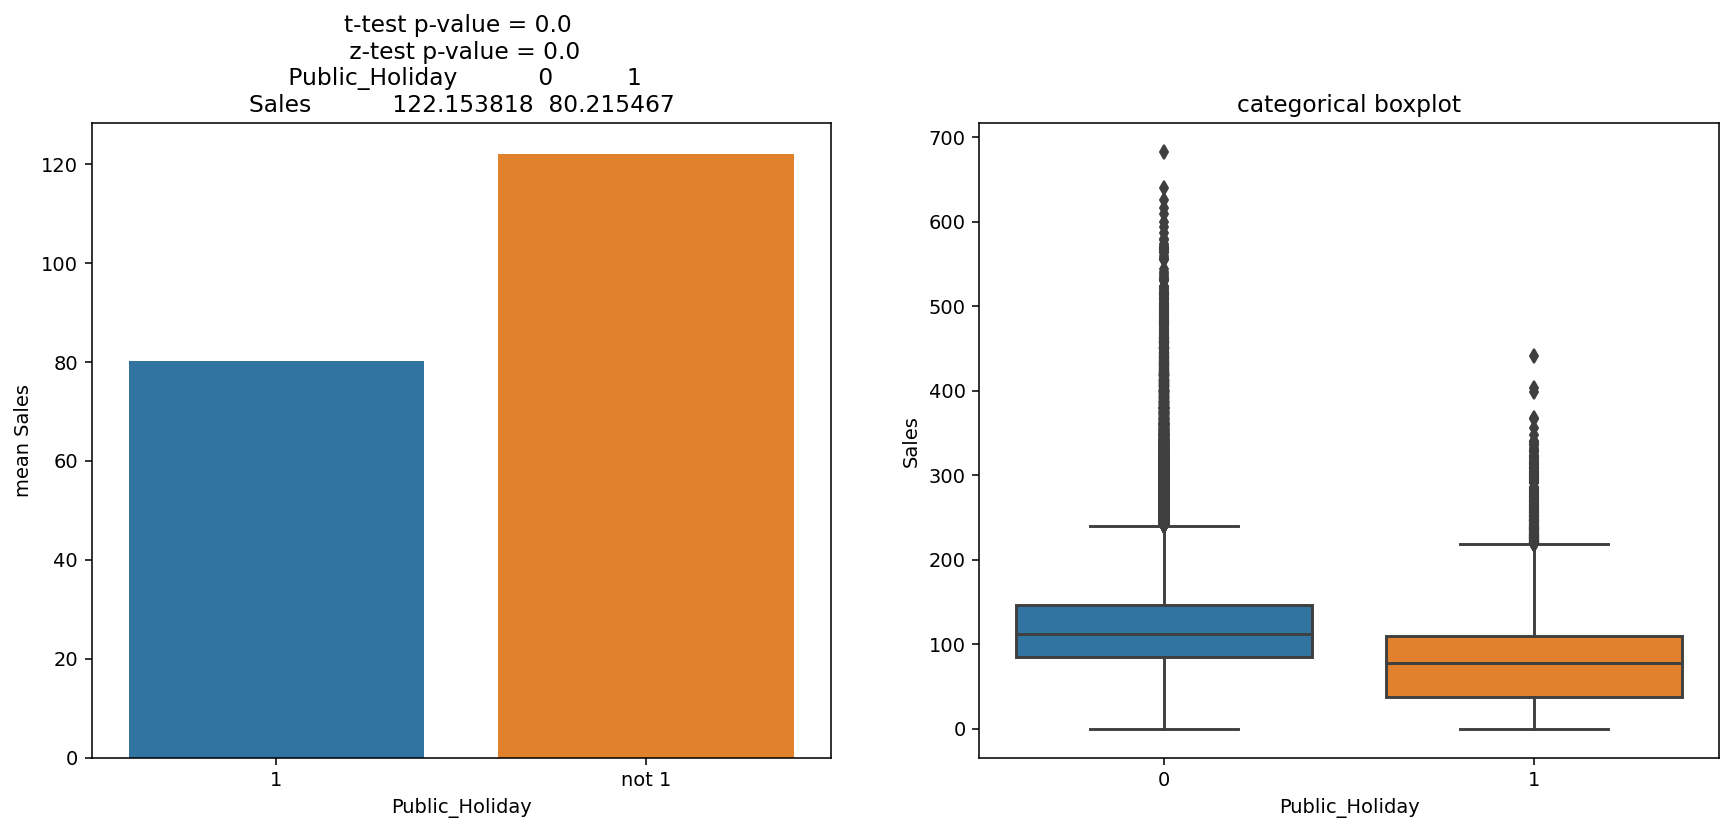

In [19]:
Bivariate_cont_cat(train_df, 'Sales', "Public_Holiday", 1)

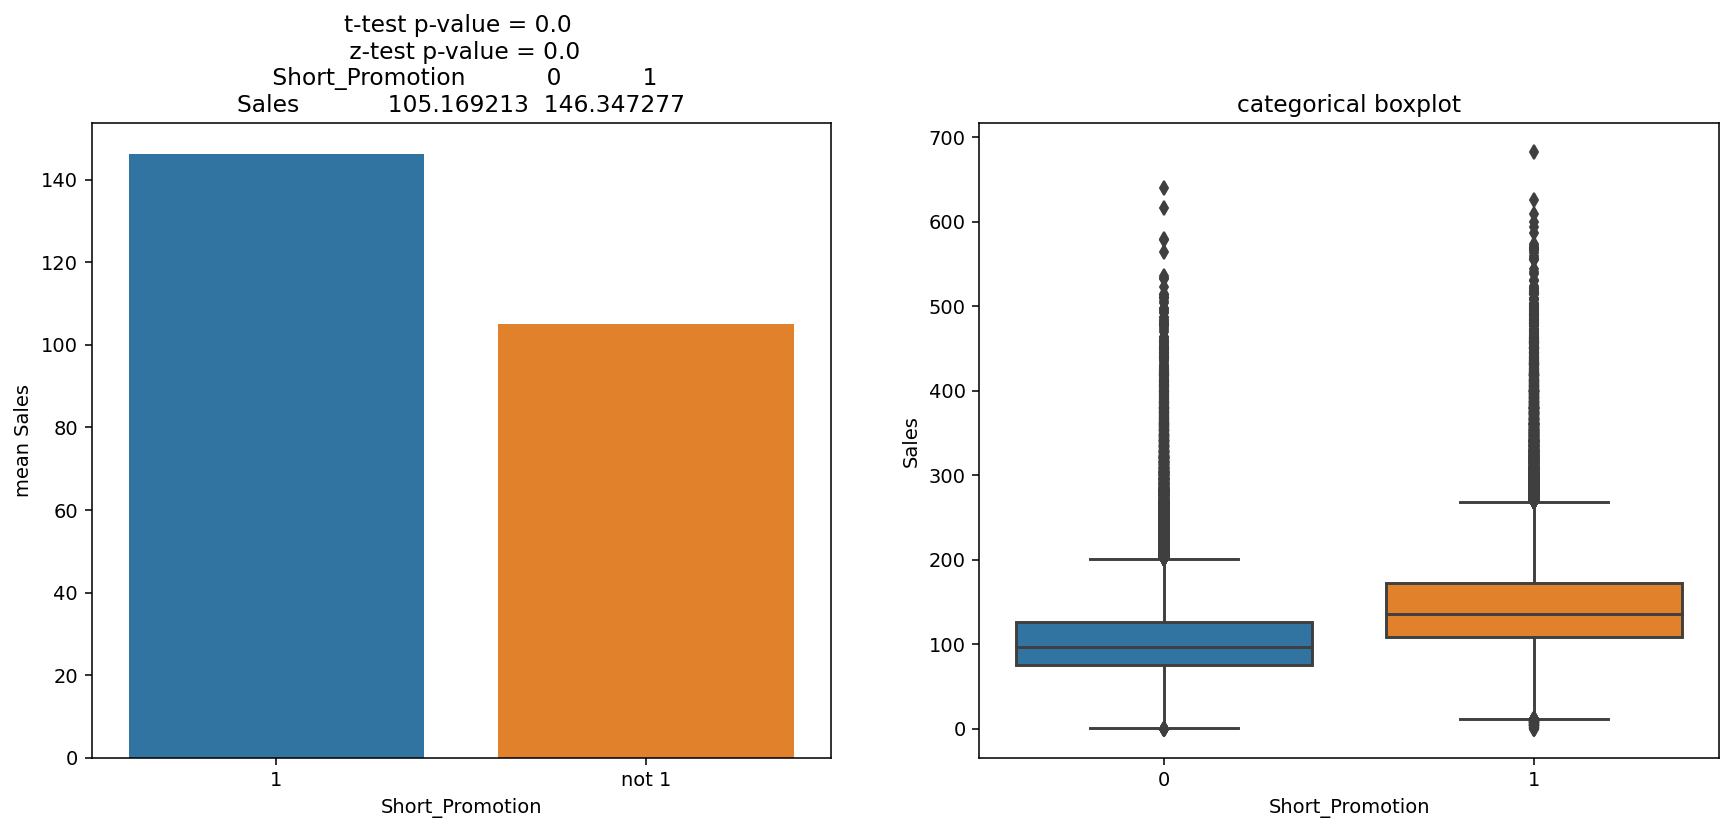

In [20]:
Bivariate_cont_cat(train_df, 'Sales', "Short_Promotion", 1)

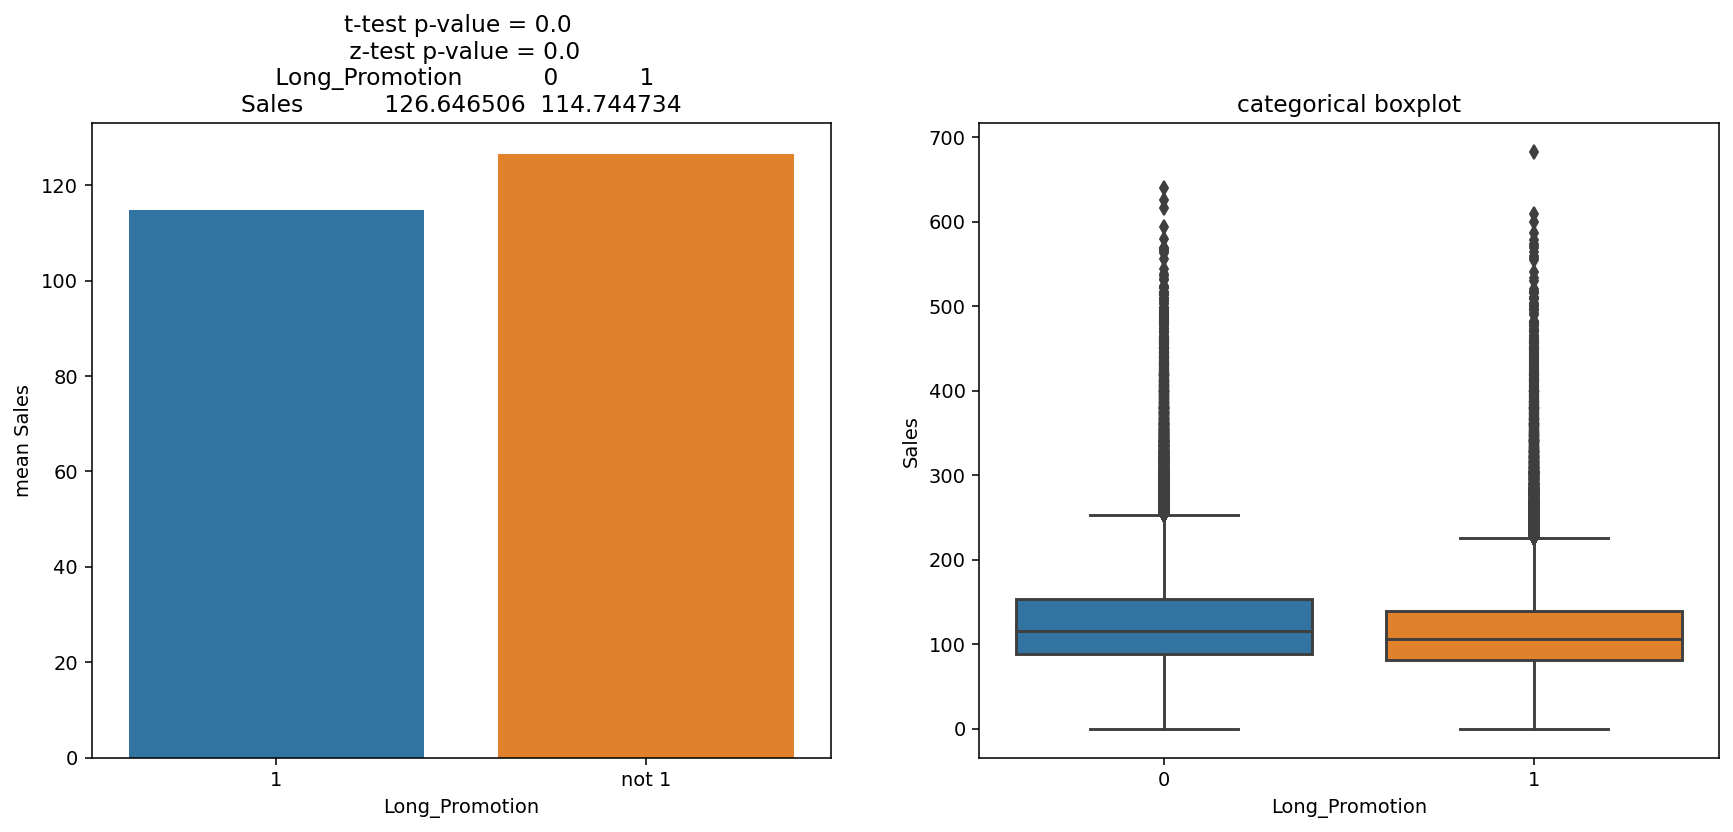

In [21]:
Bivariate_cont_cat(train_df, 'Sales', "Long_Promotion", 1)

##### Categorical Variables Vs User_Traffic

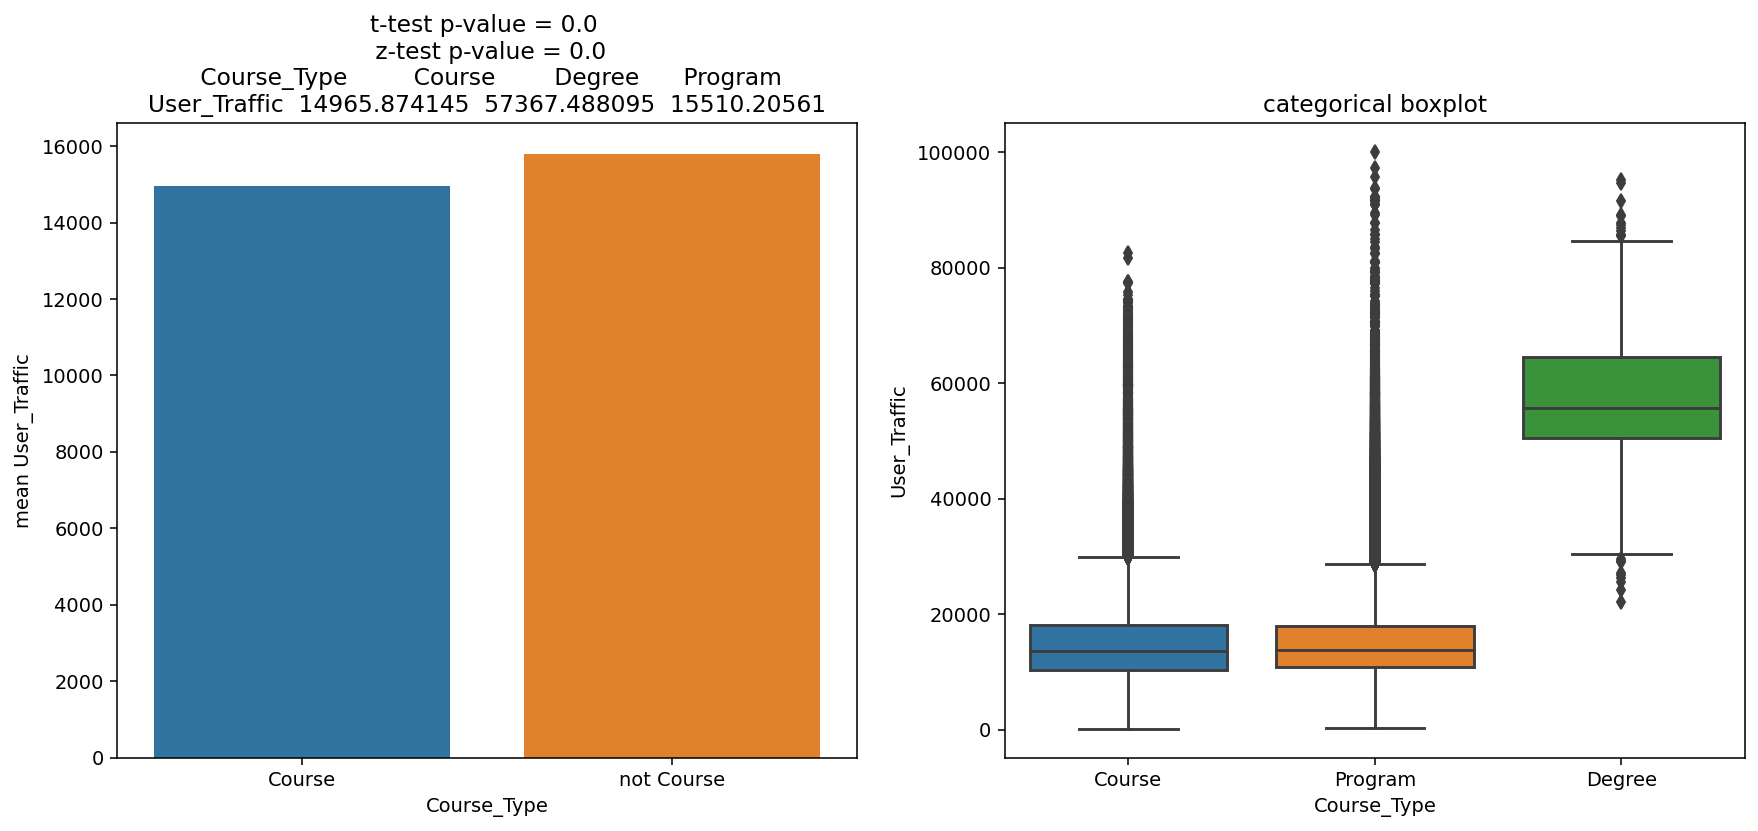

In [22]:
Bivariate_cont_cat(train_df, 'User_Traffic', "Course_Type", 'Course')

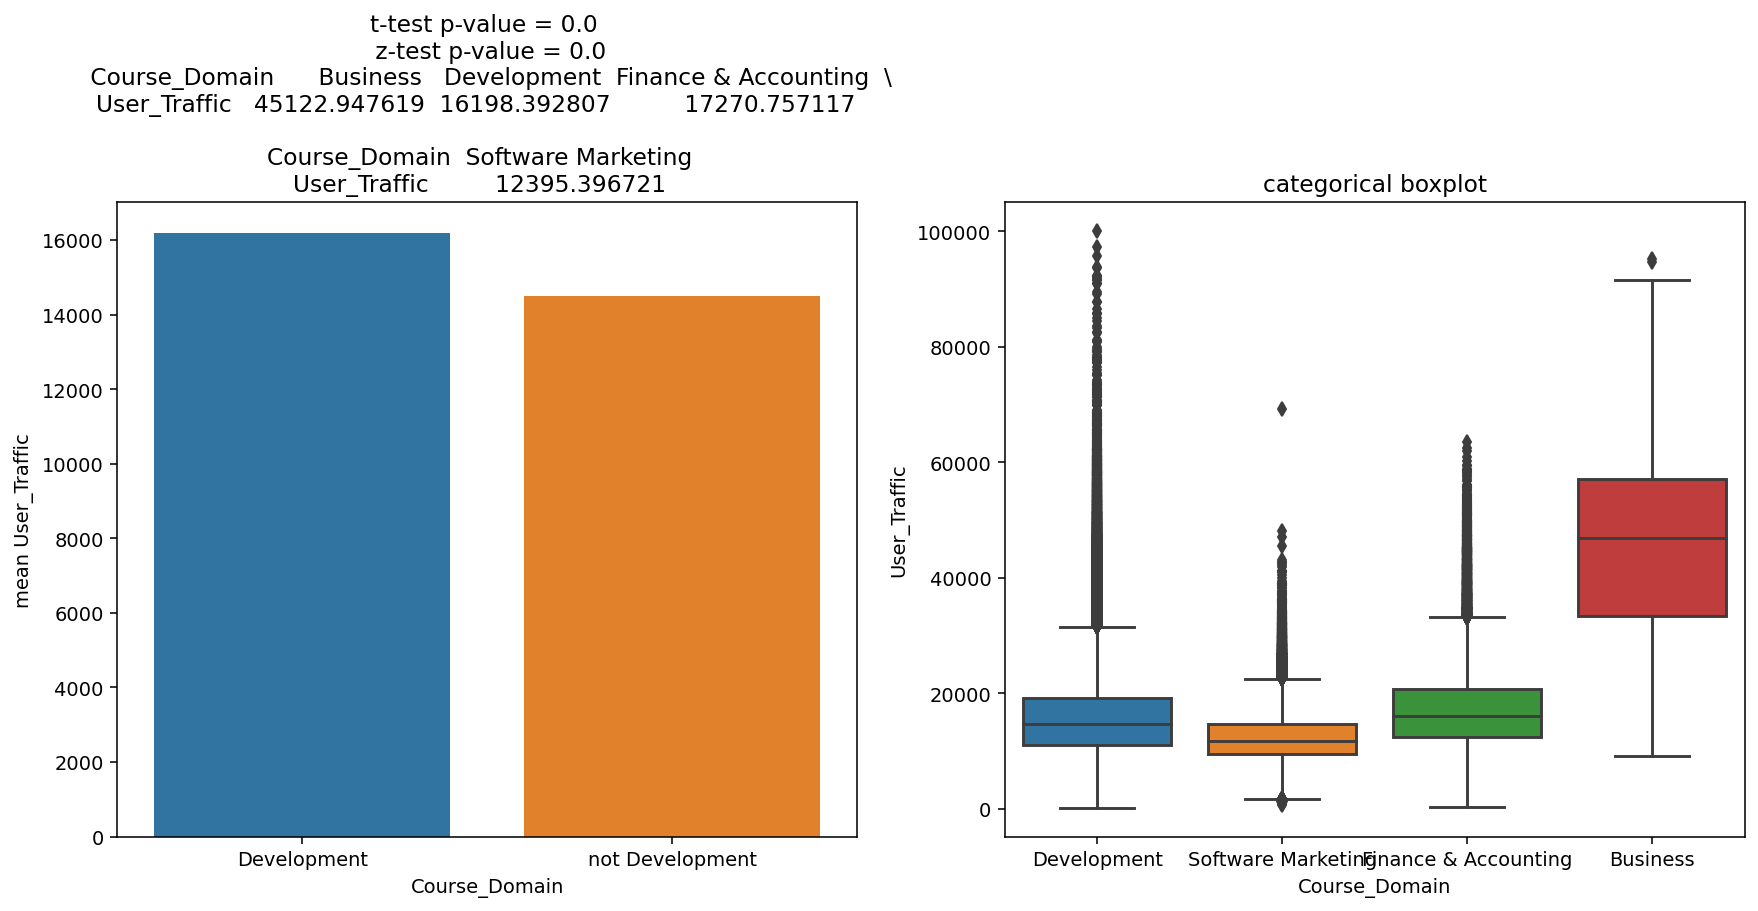

In [23]:
Bivariate_cont_cat(train_df, 'User_Traffic', "Course_Domain", 'Development')

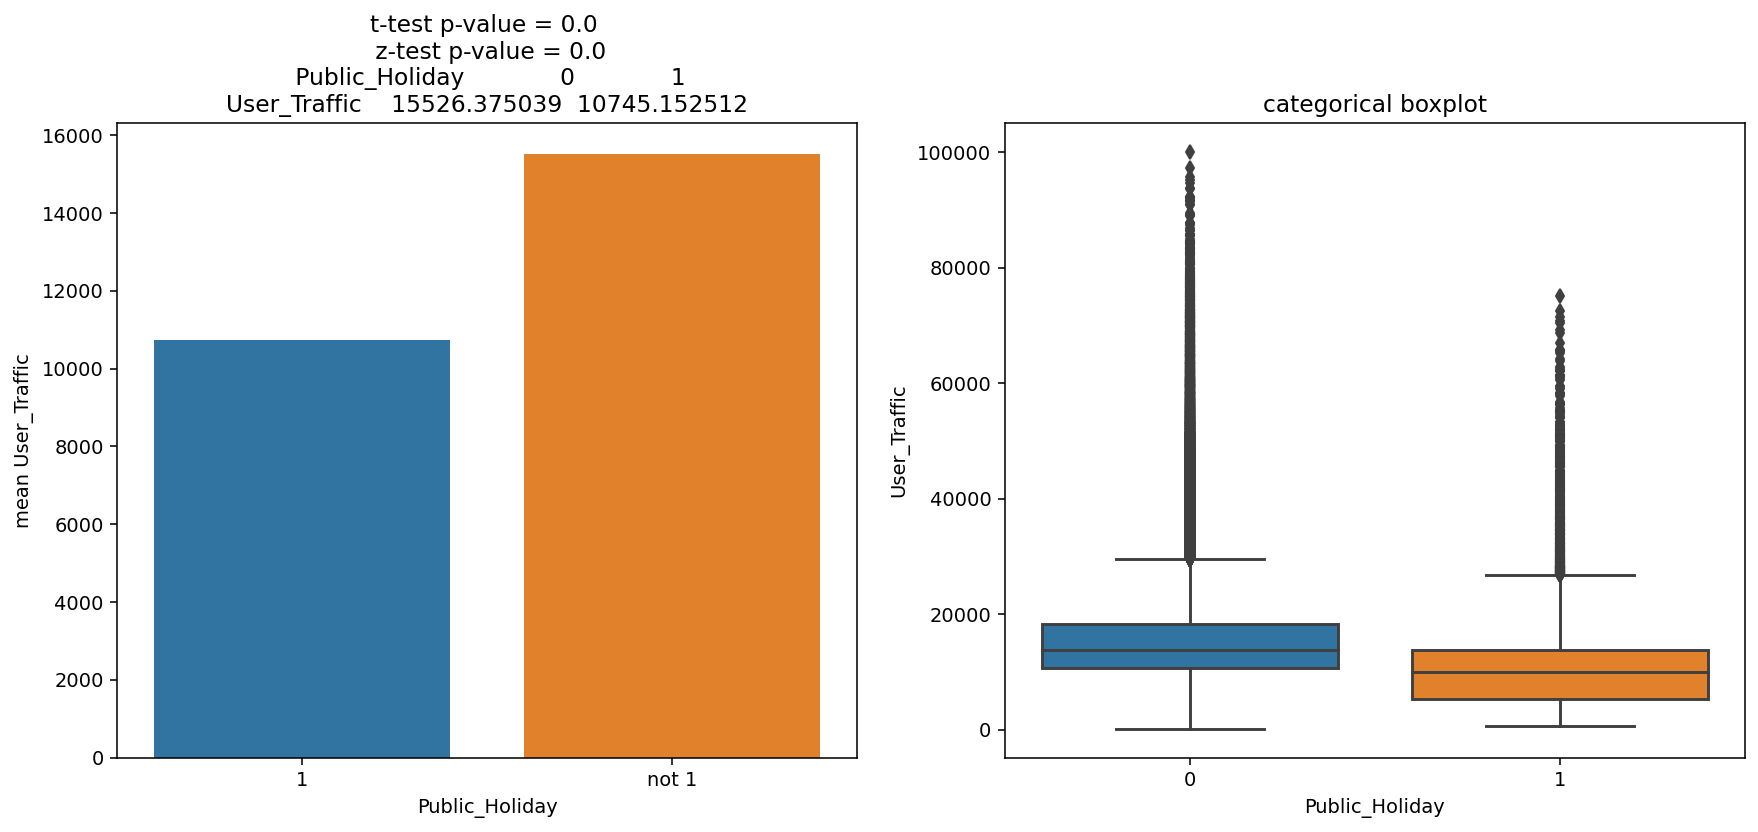

In [24]:
Bivariate_cont_cat(train_df, 'User_Traffic', "Public_Holiday", 1)

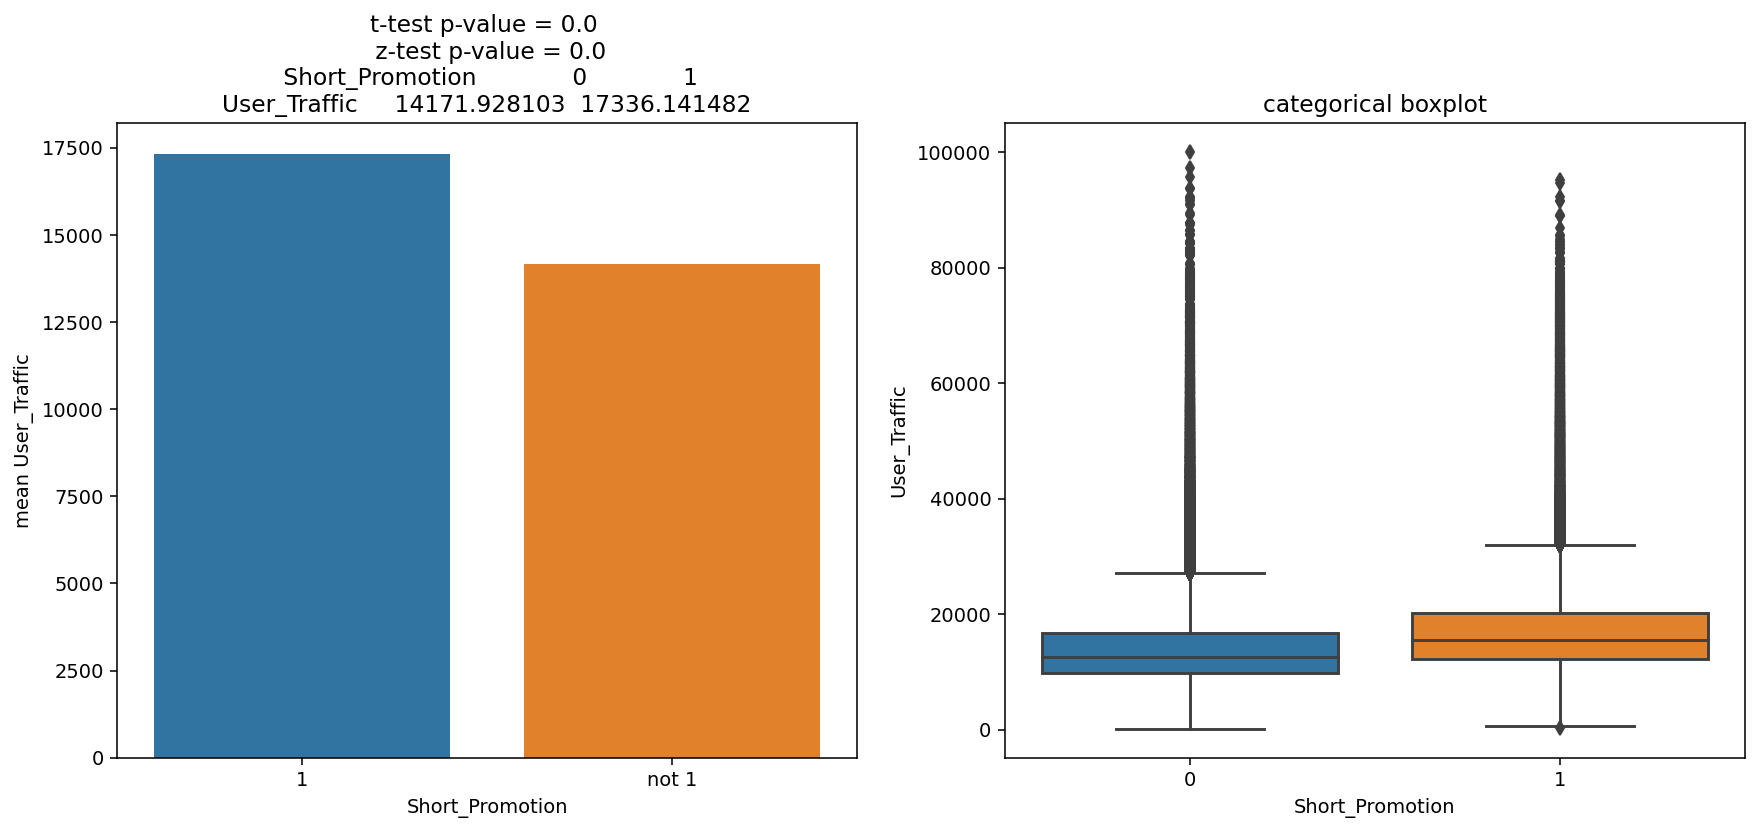

In [25]:
Bivariate_cont_cat(train_df, 'User_Traffic', "Short_Promotion", 1)

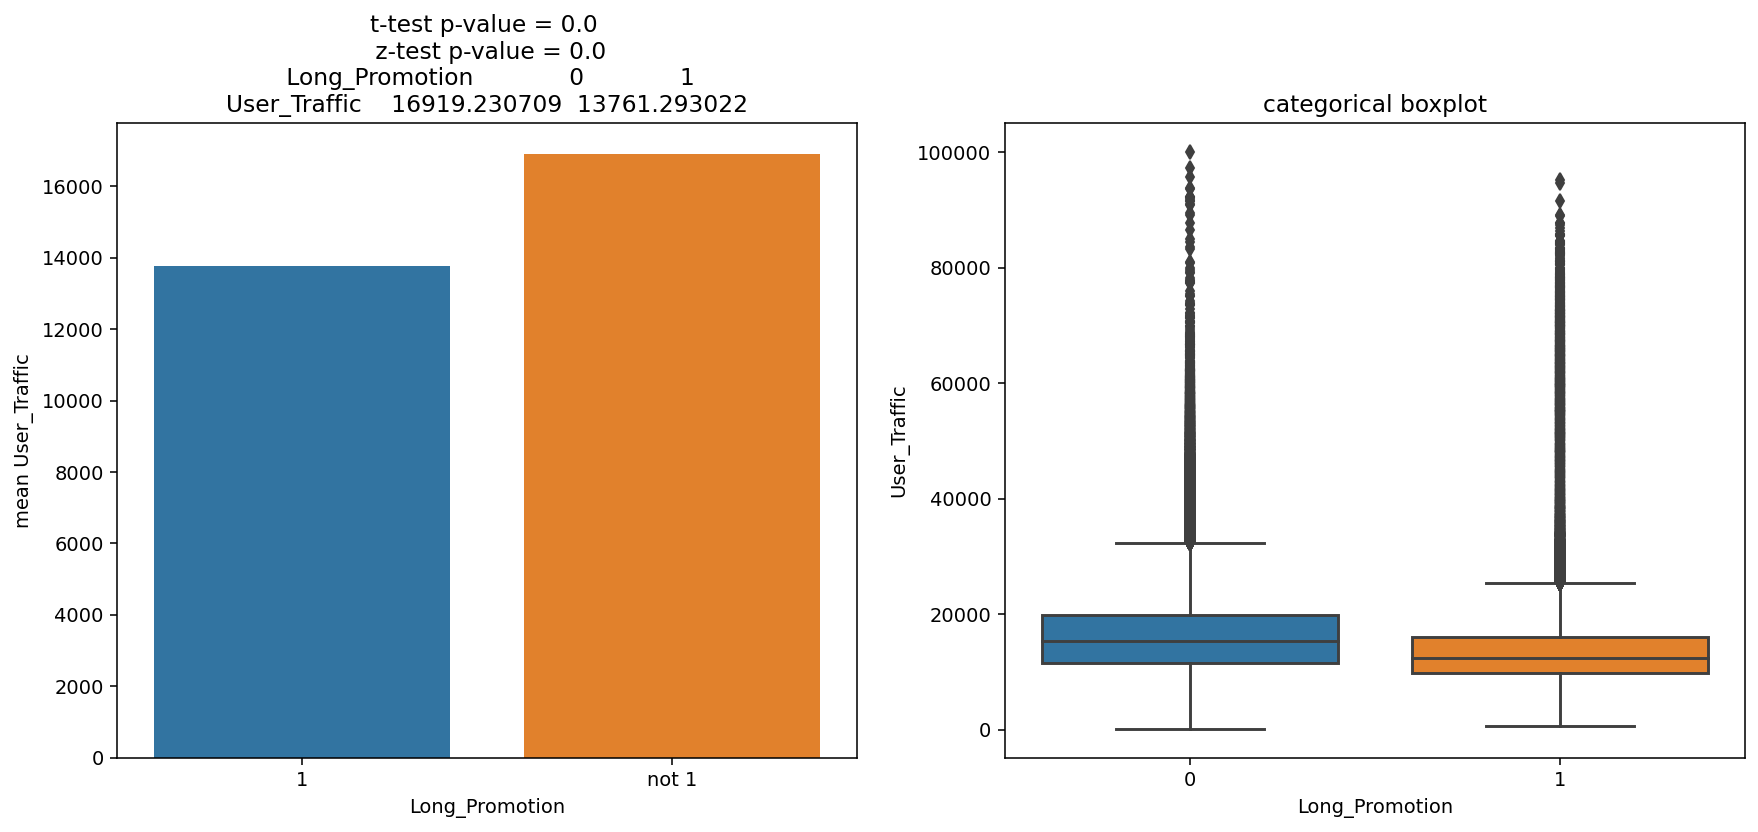

In [26]:
Bivariate_cont_cat(train_df, 'User_Traffic', "Long_Promotion", 1)

In [27]:
posible_variables = train_df.groupby(["Course_Domain", "Course_Type"]).mean()
posible_variables

Day_No  User_Traffic  \
Course_Domain        Course_Type                             
Business             Course       441.500000  36959.920635   
                     Degree       441.500000  57367.488095   
Development          Course       434.168984  15062.113276   
                     Program      438.767704  17891.731099   
Finance & Accounting Course       438.782759  17483.727361   
                     Program      437.601318  17041.580748   
Software Marketing   Course       428.035353  12152.763219   
                     Program      433.503146  12539.500364   

                                  Competition_Metric       Sales  
Course_Domain        Course_Type                                  
Business             Course                 0.013667  188.280801  
                     Degree                 0.010000  184.061224  
Development          Course                 0.052933  110.849200  
                     Program                0.093128  133.677779  
Finance & Accounting Course                 0.032837  120.157771  
                     Program                0.054526  129.214654  
Software Marketing   Course                 0.098509  112.395668  
                     Program                0.094457  122.371976

In [28]:
trial = train_df.groupby(["Course_Domain"]).mean()
trial

,Day_No,User_Traffic,Competition_Metric,Sales
Course_Domain,,,,
Business,441.500000,45122.947619,0.012200,186.592971
Development,436.015676,16198.392807,0.068994,120.016391
Finance & Accounting,438.213690,17270.757117,0.043284,124.520231
Software Marketing,431.465770,12395.396721,0.095953,118.654665


In [29]:
trial = train_df.groupby(["Course_Type"]).mean()

#### Univariate: Missing Values

In [30]:
# finding number of missing values in every variable
train_df.isnull().sum()/len(train_df)

Day_No                0.000000
Course_ID             0.000000
Course_Domain         0.000000
Course_Type           0.000000
Short_Promotion       0.000000
Public_Holiday        0.000000
Long_Promotion        0.000000
User_Traffic          0.000000
Competition_Metric    0.003445
Sales                 0.000000
dtype: float64

In [31]:
# imputing missing values with the median
train_df.Competition_Metric.fillna(0.04, inplace=True)

In [32]:
train_df.isnull().sum().sum()

0

## Step 3 - Feature Engineering

In [33]:
train_df['weekday']= train_df['Day_No'].apply(lambda x:x%7)

In [34]:
train_df.head()

,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales,weekday
ID,,,,,,,,,,,
1,1,1,Development,Course,0,1,1,11004,0.007,81,1
2,2,1,Development,Course,0,0,1,13650,0.007,79,2
3,3,1,Development,Course,0,0,1,11655,0.007,75,3
4,4,1,Development,Course,0,0,1,12054,0.007,80,4
5,5,1,Development,Course,0,0,1,6804,0.007,41,5


## Step 4 - Categorical Encoding

In [35]:
cat_cols = ['Course_Type', 'Course_Domain']

train_df = pd.get_dummies(train_df, columns = cat_cols, drop_first = True);

train_df.head()

,Day_No,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales,weekday,Course_Type_Degree,Course_Type_Program,Course_Domain_Development,Course_Domain_Finance & Accounting,Course_Domain_Software Marketing
ID,,,,,,,,,,,,,,
1,1,1,0,1,1,11004,0.007,81,1,0,0,1,0,0
2,2,1,0,0,1,13650,0.007,79,2,0,0,1,0,0
3,3,1,0,0,1,11655,0.007,75,3,0,0,1,0,0
4,4,1,0,0,1,12054,0.007,80,4,0,0,1,0,0
5,5,1,0,0,1,6804,0.007,41,5,0,0,1,0,0


## Step 4 - Train a Basic Model

In [36]:
# Remove any varibles that are not useful
train_df.drop(['User_Traffic', "Day_No"], axis = 1, inplace = True)

#### Separating the training data

In [37]:
# Let's train using a subset of training data
X = train_df.drop('Sales',axis=1)
y = train_df['Sales'].values

# training and testing split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Training the model

In [38]:
# Train a model and predict
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train) 
y_pred = rf.predict(X_test)

In [39]:
# Create a dataframe to view the results
#y_pred = np.exp(y_pred)
#y_test = np.exp(y_test)
df_results = pd.DataFrame({'Predicted': y_pred,  'Actuals': y_test})
print("R^2 : ", r2_score(y_test, y_pred))
print("RMSLE:", np.sqrt(mean_squared_log_error(y_test, y_pred))*1000)
df_results.head(10)

R^2 :  0.8010623756485121
RMSLE: 242.59456609410805


,Predicted,Actuals
0,81.876679,76
1,85.794269,115
2,127.118502,129
3,132.075997,222
4,54.695089,48
5,103.400716,107
6,164.461011,167
7,83.317083,81
8,167.706939,147
9,125.930375,177


In [40]:
df_results.shape

(102418, 2)

## Step 5 - Feature Importance

In [41]:
#!pip install rfpimp

<AxesSubplot:ylabel='Feature'>

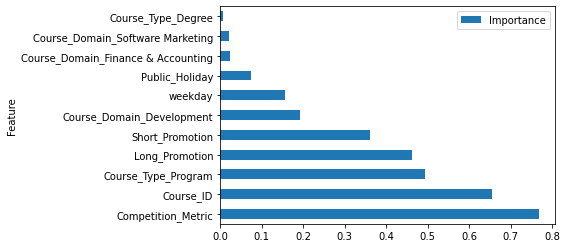

In [42]:
from sklearn.metrics import r2_score
from rfpimp import permutation_importances

def r2(rf, X_train, y_train):
    return r2_score(y_train, rf.predict(X_train))

y_train = pd.DataFrame(y_train)

perm_imp_rfpimp = permutation_importances(rf, X_train, y_train, r2)

perm_imp_rfpimp.plot.barh()

## Step 6 - Fitting on the full set of training data

In [43]:
%%time
rf.fit(X,y)

Wall time: 55.9 s


RandomForestRegressor(random_state=42)

## Step 7 - Submission

In [44]:
test_df.head()

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,Competition_Metric
0,883,883,1,Development,Course,1,0,1,0.007
1,884,884,1,Development,Course,1,0,1,0.007
2,885,885,1,Development,Course,1,0,1,0.007
3,886,886,1,Development,Course,1,0,1,0.007
4,887,887,1,Development,Course,0,0,1,0.007


#### Typecasting

In [45]:
test_df['Short_Promotion'] = test_df['Short_Promotion'].astype('O')
test_df['Public_Holiday'] = test_df['Public_Holiday'].astype('O')
test_df['Long_Promotion'] = test_df['Long_Promotion'].astype('O')
test_df['Course_ID'] = test_df['Course_ID'].astype('O')

#### EDA on test set

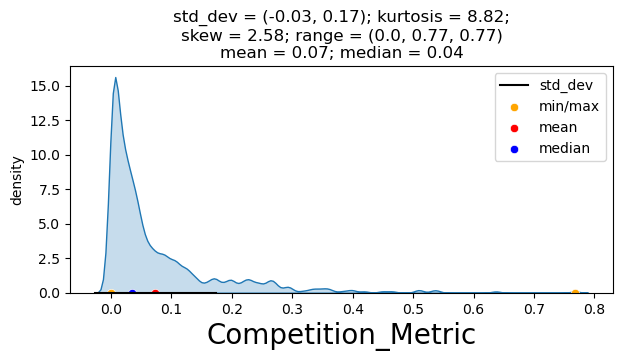

In [46]:
UVA_numeric(train_df,['Competition_Metric'])

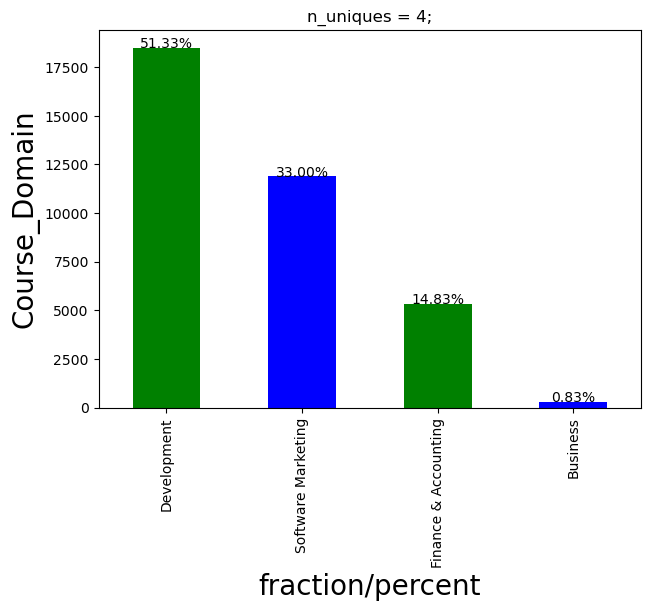

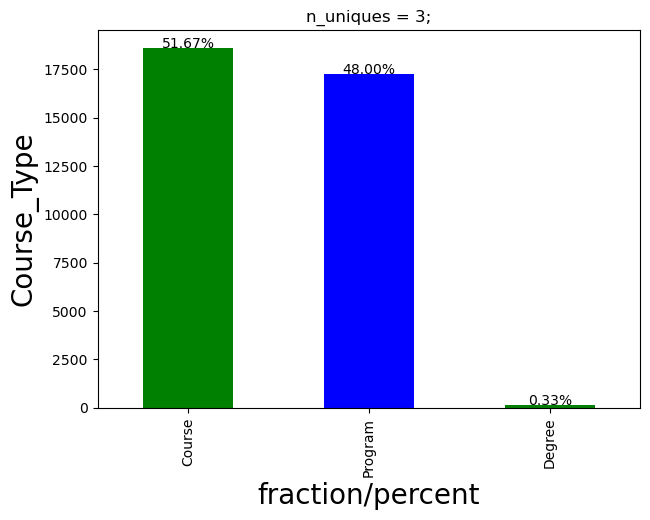

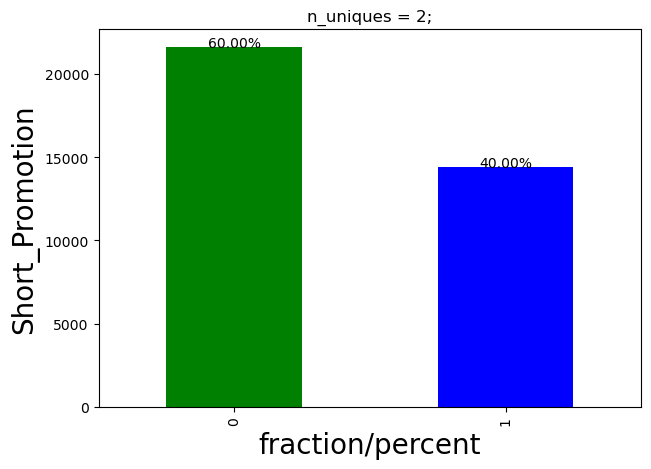

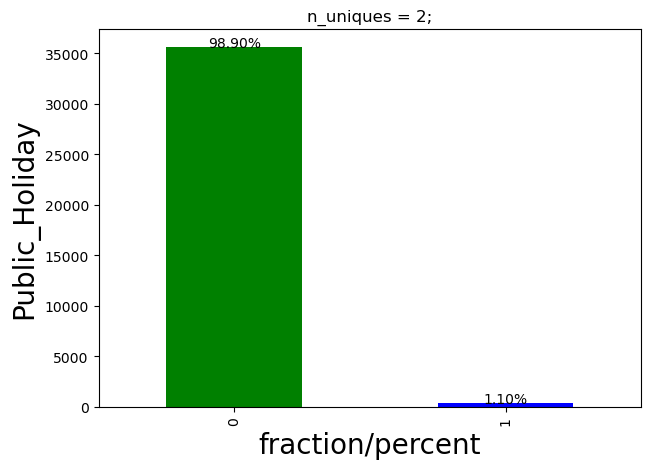

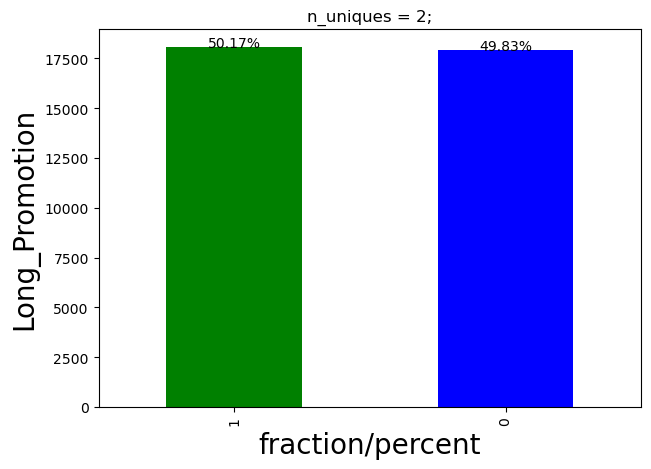

In [47]:
for i in categorical_cols:
    UVA_category(test_df, [i])

#### Missing Value imputation and Feature Engineering

In [48]:
test_df.Competition_Metric.fillna(0.04, inplace=True)
test_df['weekday']= test_df['Day_No'].apply(lambda x:x%7)

#### Checking Imputed Values

In [49]:
test_df.isnull().sum()

ID                    0
Day_No                0
Course_ID             0
Course_Domain         0
Course_Type           0
Short_Promotion       0
Public_Holiday        0
Long_Promotion        0
Competition_Metric    0
weekday               0
dtype: int64

#### Creating Test Features

In [50]:
# Droping ID's to create test set features
test_features = test_df.drop(['ID', 'Day_No'], axis = 1)

# Encoding categorical features
test_features = pd.get_dummies(test_features, columns = cat_cols, drop_first = True);

#test_df['Sales'] = rf.predict(test_features)
test_features.head()

,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion,Competition_Metric,weekday,Course_Type_Degree,Course_Type_Program,Course_Domain_Development,Course_Domain_Finance & Accounting,Course_Domain_Software Marketing
0,1,1,0,1,0.007,1,0,0,1,0,0
1,1,1,0,1,0.007,2,0,0,1,0,0
2,1,1,0,1,0.007,3,0,0,1,0,0
3,1,1,0,1,0.007,4,0,0,1,0,0
4,1,0,0,1,0.007,5,0,0,1,0,0


#### Predicting the sales

In [51]:
test_df['Sales'] = rf.predict(test_features)

## Step 8 - Submission File

In [52]:
test_df[['ID', 'Sales']].head(10)

,ID,Sales
0,883,115.843441
1,884,120.444944
2,885,101.349449
3,886,92.364373
4,887,51.001237
5,888,72.886610
6,889,78.119709
7,890,73.329100
8,891,86.504596
9,892,73.018769


<IPython.core.display.Javascript object>

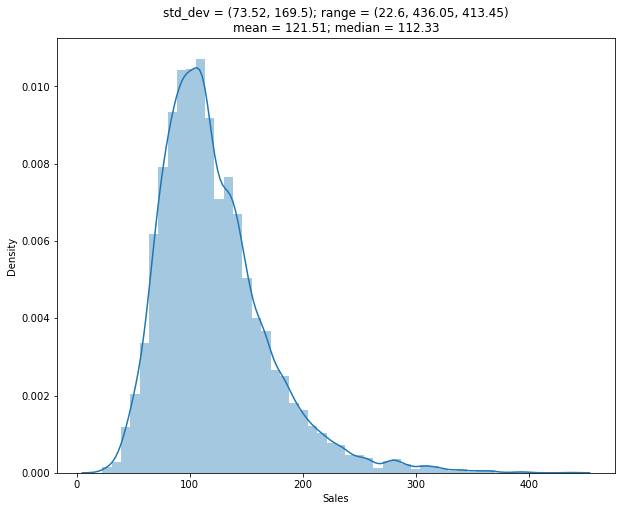

In [53]:
target_distribution(test_df, 'Sales')

In [54]:
test_df[['ID', 'Sales']].to_csv('rf_preds.csv', index = False)

[Competition Site](https://datahack.analyticsvidhya.com/contest/sbsa-regression-problem/#MySubmissions)